# Create saved labeledDataFrames for synthetic datasets

In [1]:
import mlsim
import detect_simpsons_paradox as dsp
import numpy as np
import string
from mlsim import sp_plot

In [2]:
n_view = 8
r_clusters =     [.8, .5, .9, .7, .4, .75, .9,-.6]  # magnitude correlation coefficient of clusters
cluster_spread = [.8, -.2, .1,-.6, .2, -.3, .6,.3] # pearson correlation of means
p_sp_clusters =  [.6,  0, .5, .5,  1,   0,.5,.2] # portion of clusters with SP 
k =              [5,   3,  6,  4,  8,   6,  4, 3] # number of clusters
cluster_size =   [10,  2]#
domain_range = [0, 20, 0, 20] # of all data
N = 500 # number of points total
p_clusters = [np.random.dirichlet([k_i*2]*k_i) for k_i in k]


many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)
# print largest and smallest cluster sizes
print([many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])])
print([many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])])

/home/smb/anaconda3/lib/python3.6/site-packages/mlsim/simpsons_paradox.py:209: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  cluster_covs[c_sp[z_i]]+cov_noise()) for z_i in z])


[63, 135, 38, 90, 41, 54, 62, 32]
[185, 212, 120, 173, 75, 121, 195, 269]


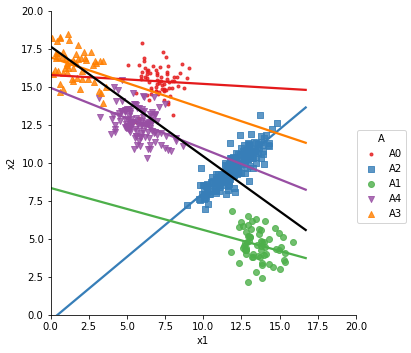

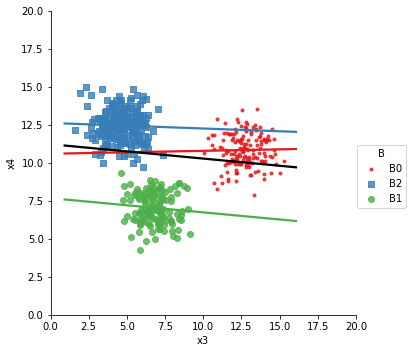

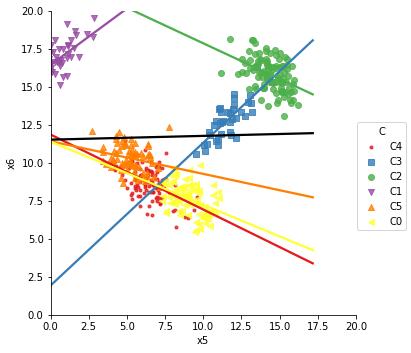

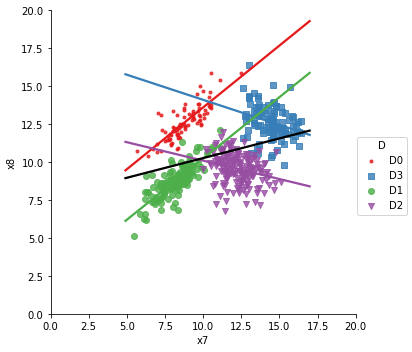

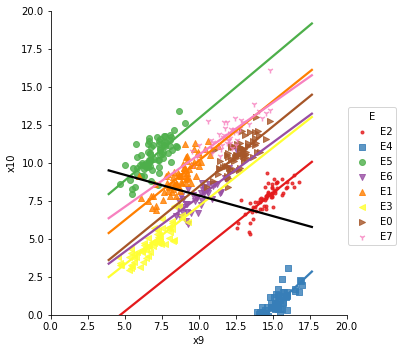

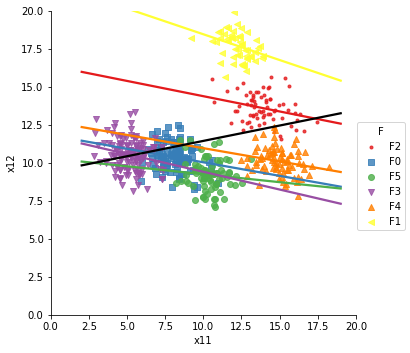

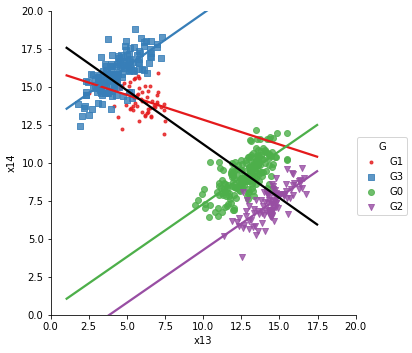

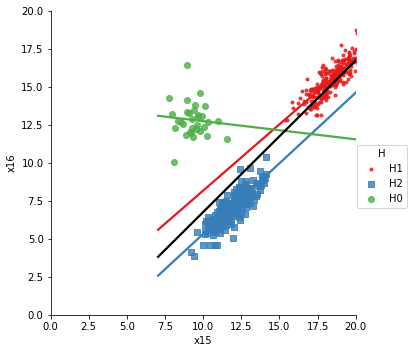

In [3]:
view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]

for view in view_list:
    sp_plot(many_sp_df,*view)
    
# sp_plot(many_sp_df,'x3','x4','B')

# many_sp_df.head()

In [4]:
labeled_df = dsp.labeledDataFrame(many_sp_df)

In [5]:
roles = {'x'+str(i+1):'trend' for i in range(n_view*2)}
roles.update( {c:'groupby' for c in list(string.ascii_uppercase[:n_view])})
count_list = []
var_types = {'x'+str(i+1):'continuous' for i in range(n_view*2)}
var_types.update( {c:'categorical' for c in list(string.ascii_uppercase[:n_view])})
weighting = {}

# labeled_df.set_weighting_vars(weighting)


labeled_df.set_counts(count_list)
labeled_df.set_roles(roles)
labeled_df.set_var_types(var_types)
labeled_df.meta_df

/home/smb/anaconda3/lib/python3.6/site-packages/detect_simpsons_paradox/labeled_dataframe.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.meta_df['role'][k] = v
/home/smb/anaconda3/lib/python3.6/site-packages/detect_simpsons_paradox/labeled_dataframe.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.meta_df['var_type'][k] = v


,dtype,var_type,role,isCount,weighting_var
variable,,,,,
x1,float64,continuous,trend,False,NaN
x2,float64,continuous,trend,False,NaN
x3,float64,continuous,trend,False,NaN
x4,float64,continuous,trend,False,NaN
x5,float64,continuous,trend,False,NaN
x6,float64,continuous,trend,False,NaN
x7,float64,continuous,trend,False,NaN
x8,float64,continuous,trend,False,NaN
x9,float64,continuous,trend,False,NaN


In [6]:
labeled_df.to_csvs('../data/synthetic_continuous16')

In [65]:
for alpha in [.1,1,2,5,7,10,100,200]:
    for i in range(4):
        p_clusters = [np.random.dirichlet([alpha]*k_i) for k_i in k]


        many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                        domain_range,k,N,p_clusters)
        # print largest and smallest cluster sizes
        print('alpha = ',alpha)
        mins = [many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])]
        maxs = [many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])]
        print('smallest',mins)
        print('largest',maxs)
        print('ratio',[np.round(b/a,2) for a,b in zip(mins,maxs)])

alpha =  0.1
smallest [2, 158, 500, 25, 1, 1, 22, 110]
largest [498, 342, 500, 407, 308, 425, 478, 237]
ratio [249.0, 2.16, 1.0, 16.28, 308.0, 425.0, 21.73, 2.15]
alpha =  0.1
smallest [62, 1, 500, 16, 1, 36, 2, 5]
largest [275, 487, 500, 249, 335, 464, 454, 495]
ratio [4.44, 487.0, 1.0, 15.56, 335.0, 12.89, 227.0, 99.0]
alpha =  0.1
smallest [23, 500, 105, 87, 21, 6, 1, 2]
largest [319, 500, 395, 413, 422, 276, 499, 498]
ratio [13.87, 1.0, 3.76, 4.75, 20.1, 46.0, 499.0, 249.0]
alpha =  0.1
smallest [500, 2, 25, 98, 7, 2, 61, 121]
largest [500, 498, 475, 402, 479, 344, 439, 203]
ratio [1.0, 249.0, 19.0, 4.1, 68.43, 172.0, 7.2, 1.68]
alpha =  1
smallest [30, 46, 190, 27, 23, 2, 44, 140]
largest [193, 253, 310, 375, 107, 178, 230, 195]
ratio [6.43, 5.5, 1.63, 13.89, 4.65, 89.0, 5.23, 1.39]
alpha =  1
smallest [17, 42, 109, 30, 4, 7, 18, 53]
largest [166, 354, 391, 360, 132, 220, 339, 360]
ratio [9.76, 8.43, 3.59, 12.0, 33.0, 31.43, 18.83, 6.79]
alpha =  1
smallest [25, 76, 39, 52, 23, 5,

In [18]:

for alpha in [.1,1,2,5,7,10,100,200]:
    for i in range(5):
        p_clusters = [np.random.dirichlet([alpha*k_i]*k_i) for k_i in k]


        many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                        domain_range,k,N,p_clusters)
        # print largest and smallest cluster sizes
        print('alpha = ',alpha)
        mins = [many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])]
        maxs = [many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])]
        print('smallest',mins)
        print('largest',maxs)
        print('ratio',[np.round(b/a,2) for a,b in zip(mins,maxs)])

alpha =  0.1
smallest [16, 500, 1, 15, 6, 27, 1, 36]
largest [193, 500, 499, 319, 149, 305, 498, 464]
ratio [12.06, 1.0, 499.0, 21.27, 24.83, 11.3, 498.0, 12.89]
alpha =  0.1
smallest [1, 20, 1, 79, 20, 9, 23, 18]
largest [282, 480, 499, 211, 168, 228, 206, 359]
ratio [282.0, 24.0, 499.0, 2.67, 8.4, 25.33, 8.96, 19.94]
alpha =  0.1
smallest [14, 1, 500, 3, 7, 2, 132, 10]
largest [232, 461, 500, 294, 302, 223, 196, 434]
ratio [16.57, 461.0, 1.0, 98.0, 43.14, 111.5, 1.48, 43.4]
alpha =  0.1
smallest [13, 23, 18, 81, 10, 13, 107, 12]
largest [325, 288, 482, 419, 171, 271, 201, 433]
ratio [25.0, 12.52, 26.78, 5.17, 17.1, 20.85, 1.88, 36.08]
alpha =  0.1
smallest [2, 4, 61, 109, 5, 1, 2, 161]
largest [384, 290, 439, 232, 126, 366, 362, 339]
ratio [192.0, 72.5, 7.2, 2.13, 25.2, 366.0, 181.0, 2.11]
alpha =  1
smallest [48, 74, 207, 46, 31, 24, 79, 38]
largest [140, 246, 293, 218, 103, 199, 177, 340]
ratio [2.92, 3.32, 1.42, 4.74, 3.32, 8.29, 2.24, 8.95]
alpha =  1
smallest [48, 89, 183, 72, 4